In [1]:
# Linear Regression
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import os
os.chdir("C://Digital Nest/Linear Regression")
print (os.getcwd())

C:\Digital Nest\Linear Regression


In [2]:
HP = pd.read_csv('House Prices.csv')
HP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(HP.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [6]:
HP.shape

(1460, 81)

Missing Values Treatment

In [10]:
Nulldf = pd.DataFrame(HP.isnull().sum(),columns=["NullCount"])
print(Nulldf.head())

             NullCount
Id                   0
MSSubClass           0
MSZoning             0
LotFrontage        259
LotArea              0


In [11]:
# get variables with null values
Nulldf[Nulldf.NullCount > 0]

,NullCount
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [13]:
Nulldf["NullPerc"] = Nulldf.NullCount / HP.shape[0]
print(Nulldf.head())

             NullCount  NullPerc
Id                   0  0.000000
MSSubClass           0  0.000000
MSZoning             0  0.000000
LotFrontage        259  0.177397
LotArea              0  0.000000


In [14]:
Nulldf[Nulldf.NullPerc > 0]

,NullCount,NullPerc
LotFrontage,259,0.177397
Alley,1369,0.937671
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinType2,38,0.026027
Electrical,1,0.000685


In [15]:
Nulldf[Nulldf.NullPerc > 0.10]

,NullCount,NullPerc
LotFrontage,259,0.177397
Alley,1369,0.937671
FireplaceQu,690,0.472603
PoolQC,1453,0.995205
Fence,1179,0.807534
MiscFeature,1406,0.963014


In [21]:
Nulldf[(Nulldf.NullPerc > 0) & (Nulldf.NullPerc <= 0.10)]

,NullCount,NullPerc
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinType2,38,0.026027
Electrical,1,0.000685
GarageType,81,0.055479
GarageYrBlt,81,0.055479


In [22]:
from collections import Counter
print(Counter(HP.MasVnrType))

Counter({'None': 864, 'BrkFace': 445, 'Stone': 128, 'BrkCmn': 15, nan: 8})


In [23]:
HP.MasVnrType.fillna(value = 'None',inplace=True)
print(Counter(HP.MasVnrType))

Counter({'None': 872, 'BrkFace': 445, 'Stone': 128, 'BrkCmn': 15})


In [24]:
HP.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

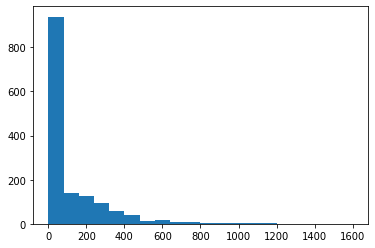

In [26]:
plt.hist(HP.MasVnrArea,bins=20)
plt.show()

In [31]:
HP.MasVnrArea.quantile(q=[0.5,0.59,0.6,0.7,0.8,0.9,1.0])

0.50       0.0
0.59       0.0
0.60      16.0
0.70     117.0
0.80     206.0
0.90     335.0
1.00    1600.0
Name: MasVnrArea, dtype: float64

In [32]:
HP.MasVnrArea.fillna(value = 0,inplace=True)
print(HP.MasVnrArea.describe())

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [33]:
Counter(HP.BsmtQual)

Counter({'Gd': 618, 'TA': 649, 'Ex': 121, nan: 37, 'Fa': 35})

In [34]:
HP.BsmtQual.fillna(value = 'NB',inplace=True)
print(Counter(HP.BsmtQual))

Counter({'TA': 649, 'Gd': 618, 'Ex': 121, 'NB': 37, 'Fa': 35})


In [35]:
Counter(HP.Electrical)

Counter({'SBrkr': 1334,
         'FuseF': 27,
         'FuseA': 94,
         'FuseP': 3,
         'Mix': 1,
         nan: 1})

In [ ]:
HP.Electrical.fillna(value = 'NB',inplace=True)
print(Counter(HP.Electrical))

Relation between independent continuous data & Sale Price

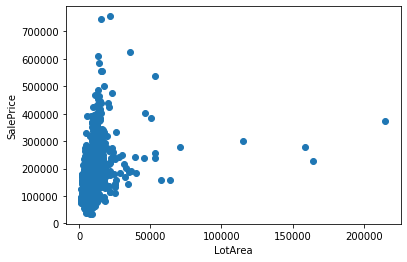

In [15]:
plt.scatter(HP.LotArea, HP.SalePrice)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

In [16]:
np.corrcoef(HP.LotArea, HP.SalePrice)

array([[1.        , 0.26384335],
       [0.26384335, 1.        ]])

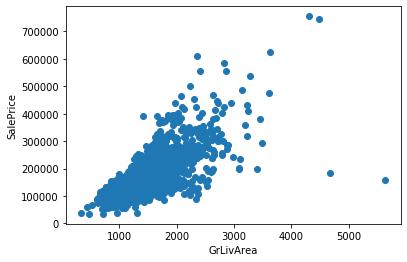

In [17]:
plt.scatter(HP.GrLivArea, HP.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [18]:
np.corrcoef(HP.GrLivArea, HP.SalePrice)

array([[1.        , 0.70862448],
       [0.70862448, 1.        ]])

In [4]:
HP.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
HP.SalePrice.quantile(q=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1.0])

0.10    106475.00
0.20    124000.00
0.30    135500.00
0.40    147000.00
0.50    163000.00
0.60    179280.00
0.70    198620.00
0.80    230000.00
0.90    278000.00
0.95    326100.00
0.99    442567.01
1.00    755000.00
Name: SalePrice, dtype: float64

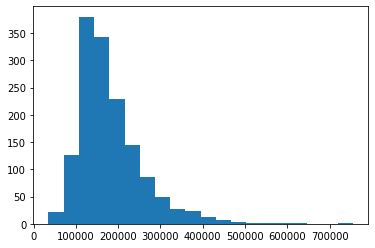

In [9]:
plt.hist(HP.SalePrice,bins=20)
plt.show()

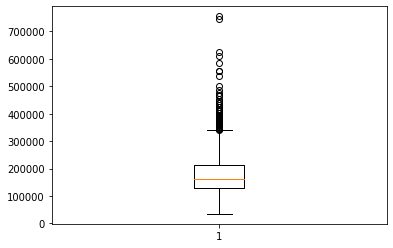

In [10]:
plt.boxplot(HP.SalePrice)
plt.show()

In [14]:
Counter(HP.MSSubClass)

Counter({60: 299,
         20: 536,
         70: 60,
         50: 144,
         190: 30,
         45: 12,
         90: 52,
         120: 87,
         30: 69,
         85: 20,
         80: 58,
         160: 63,
         75: 16,
         180: 10,
         40: 4})

In [7]:
HP.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [8]:
np.unique(HP.LotShape,return_counts=True)

(array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array([484,  41,  10, 925], dtype=int64))

In [11]:
print(HP.LotFrontage.describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [12]:
print(np.array(HP.LotFrontage).shape)
print(np.array(HP.LotFrontage).reshape(-1,1).shape)

(1460,)
(1460, 1)


In [13]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy='mean')
HP.LotFrontage = SI.fit_transform(np.array(HP.LotFrontage).reshape(-1,1))
print(HP.LotFrontage.describe())

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [42]:
print(HP.YearBuilt.isnull().sum())
print(HP.YrSold.isnull().sum())
print(HP.YearRemodAdd.isnull().sum())

0
0
0


In [43]:
# calculate the age of the house
HP["Age"] = HP.YrSold - HP.YearBuilt
print(HP.Age.isnull().sum())
print(HP.Age.describe())
HP.Remodage = HP.YrSold - HP.YearRemodAdd
print(HP.Remodage.describe())

0
count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age, dtype: float64
count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
dtype: float64


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [16]:
HP[HP.YrSold < HP.YearRemodAdd].YearRemodAdd

523    2008
Name: YearRemodAdd, dtype: int64

In [17]:
#HP.loc[HP.Remodage < 0,HP.Remodage] = 0
#print(HP.Remodage.describe())

In [44]:
# correlation between age and sale price
np.corrcoef(HP.SalePrice, HP.Age)

array([[ 1.        , -0.52335042],
       [-0.52335042,  1.        ]])

In [45]:
len(HP.Age[HP.Age==0])

64

In [48]:
np.corrcoef(HP.TotalBsmtSF,HP.SalePrice)

array([[1.        , 0.61358055],
       [0.61358055, 1.        ]])

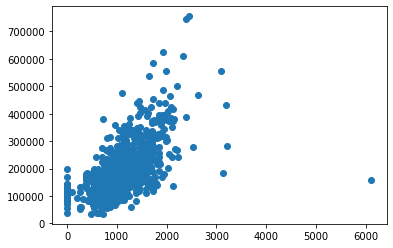

In [49]:
plt.scatter(HP.TotalBsmtSF,HP.SalePrice)
plt.show()

In [19]:
# define dataframe for independent variables
Independent = pd.DataFrame(HP,columns=["GrLivArea"])
Independent.describe()

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


In [20]:
# define dataframe for dependent variables
Dependent = pd.DataFrame(HP,columns=["SalePrice"])
Dependent.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [22]:
# build linear model using sklearn
from sklearn.linear_model import LinearRegression
# initialize linear model
lm = LinearRegression(fit_intercept=True, normalize=False)
# apply linear model
lm.fit(Independent, Dependent)
print ("coeeficient: ", lm.coef_)
print ("intercept: ",lm.intercept_)

coeeficient:  [[107.13035897]]
intercept:  [18569.02585649]


In [23]:
# R square
print(lm.score(Independent, Dependent))

0.5021486502718042


In [24]:
predict = lm.predict(Independent)
print(predict[0:10])

[[201761.93968805]
 [153767.53887136]
 [209903.84696945]
 [202511.85220081]
 [254041.55486337]
 [164480.57476794]
 [200047.8539446 ]
 [242471.47609506]
 [208618.28266186]
 [133948.42246268]]


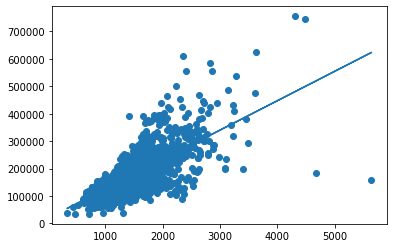

In [26]:
plt.scatter(HP.GrLivArea,HP.SalePrice)
plt.plot(HP.GrLivArea,predict)
plt.show()

In [28]:
# create a list with required columns
selcolumns = list(['TotalBsmtSF','GrLivArea','GarageArea','MiscVal','Neighborhood'])

In [27]:
# check correlation between sale price and TotalBsmtSF
np.corrcoef(HP.SalePrice,HP.TotalBsmtSF)

array([[1.        , 0.61358055],
       [0.61358055, 1.        ]])

In [28]:
# check correlation between sale price and GrLivArea
np.corrcoef(HP.SalePrice,HP.GrLivArea)

array([[1.        , 0.70862448],
       [0.70862448, 1.        ]])

In [29]:
# check correlation between sale price and GarageArea
np.corrcoef(HP.SalePrice,HP.GarageArea)

array([[1.        , 0.62343144],
       [0.62343144, 1.        ]])

In [30]:
# check correlation between sale price and MiscVal
np.corrcoef(HP.SalePrice,HP.MiscVal)

array([[ 1.        , -0.02118958],
       [-0.02118958,  1.        ]])

In [33]:
np.unique(HP.Neighborhood)

array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype=object)

In [31]:
# apply anova f-test on Neighbourhood and sale price
import statsmodels.api as sm
from statsmodels.formula.api import ols
ftest = ols("SalePrice ~ Neighborhood", data=HP).fit()
anova = sm.stats.anova_lm(ftest)
print(anova)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


                  df        sum_sq       mean_sq          F         PR(>F)
Neighborhood    24.0  5.023606e+12  2.093169e+11  71.784865  1.558600e-225
Residual      1435.0  4.184305e+12  2.915892e+09        NaN            NaN


In [32]:
len(Counter(HP.Neighborhood))

25

In [33]:
# apply anova f-test on Neighbourhood and sale price
import statsmodels.api as sm
from statsmodels.formula.api import ols
ftest = ols("SalePrice ~ LotShape", data=HP).fit()
anova = sm.stats.anova_lm(ftest)
print(anova)

              df        sum_sq       mean_sq          F        PR(>F)
LotShape     3.0  7.032607e+11  2.344202e+11  40.132852  6.447524e-25
Residual  1456.0  8.504651e+12  5.841106e+09        NaN           NaN


In [34]:
# apply anova f-test on MSSubClass and sale price
import statsmodels.api as sm
from statsmodels.formula.api import ols
ftest = ols("SalePrice ~ MSSubClass", data=HP).fit()
anova = sm.stats.anova_lm(ftest)
print(anova)

                df        sum_sq       mean_sq          F    PR(>F)
MSSubClass     1.0  6.541130e+10  6.541130e+10  10.431466  0.001266
Residual    1458.0  9.142500e+12  6.270576e+09        NaN       NaN


In [3]:
# create independent and dependent data files
selcolumns = list(['TotalBsmtSF','GrLivArea','GarageArea','MiscVal','Neighborhood'])
#selcolumns = list(['TotalBsmtSF','GrLivArea','GarageArea','Age',
#                   'Neighborhood','MSSubClass','MSZoning',
#                   'OverallQual'])
Independent = pd.DataFrame(HP,columns=selcolumns)
Independent.head()

,TotalBsmtSF,GrLivArea,GarageArea,MiscVal,Neighborhood
0,856,1710,548,0,CollgCr
1,1262,1262,460,0,Veenker
2,920,1786,608,0,CollgCr
3,756,1717,642,0,Crawfor
4,1145,2198,836,0,NoRidge


In [38]:
Independent.TotalBsmtSF.describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [40]:
Independent.TotalBsmtSF[Independent.TotalBsmtSF==0].shape

(37,)

In [41]:
Independent.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [42]:
Independent.GarageArea.describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [43]:
Independent.GarageArea[Independent.GarageArea==0].shape

(81,)

In [4]:
# define dataframe for dependent variable
Dependent = pd.DataFrame(HP,columns=["SalePrice"])
Dependent.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


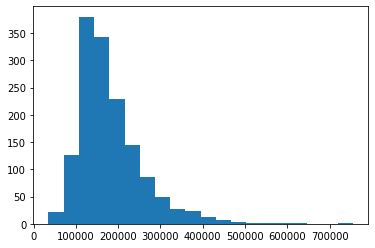

In [45]:
plt.hist(Dependent.SalePrice,bins=20)
plt.show()

In [5]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Independent,
                                                    Dependent,
                                                    test_size=0.20,
                                                   random_state=0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train[0:10])

(1168, 5)
(1168, 1)
(292, 5)
(292, 1)
      SalePrice
618      314813
870      109500
92       163500
817      271000
302      205000
1454     185000
40       160000
959      155000
75        91000
1389     131000


In [6]:
# extract only continuous columns
ContColumns = list(['TotalBsmtSF','GrLivArea','GarageArea','MiscVal'])
#ContColumns = list(['TotalBsmtSF','GrLivArea','GarageArea','Age'])
X_train_cont = pd.DataFrame(X_train,columns=ContColumns)
X_test_cont = pd.DataFrame(X_test,columns=ContColumns)
print(X_train_cont.shape)
print(X_test_cont.shape)
print(X_train_cont.head())

(1168, 4)
(292, 4)
     TotalBsmtSF  GrLivArea  GarageArea  MiscVal
618         1822       1828         774        0
870          894        894         308        0
92           876        964         432        0
817         1568       1689         857        0
302         1541       1541         843        0


In [7]:
# apply sclaing on continuous variables
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train_cont2 = SS.fit_transform(X_train_cont)
X_test_cont2 = SS.transform(X_test_cont)
print(type(X_train_cont2))
print(X_train_cont2.shape)
print(X_train_cont2[0:10])

<class 'numpy.ndarray'>
(1168, 4)
[[ 1.86572881  0.60188649  1.43474327 -0.09258767]
 [-0.38726187 -1.21671763 -0.79116606 -0.09258767]
 [-0.43096212 -1.08041967 -0.19886401 -0.09258767]
 [ 1.24906972  0.3312377   1.83120352 -0.09258767]
 [ 1.18351935  0.04306489  1.76433071 -0.09258767]
 [ 0.40662601 -0.58001147 -0.35171615 -0.09258767]
 [ 0.08372971 -0.37945877 -0.16065097 -0.09258767]
 [-0.86796463 -0.20032432  0.04952072 -0.09258767]
 [-1.43606788 -1.03368895 -0.84370899 -0.09258767]
 [-0.77328075 -0.58585281 -0.16065097 -0.09258767]]


In [8]:
# apply sclaing on target data
SS2  = StandardScaler()
Y_train_SS = SS2.fit_transform(Y_train)
Y_test_SS = SS2.transform(Y_test)
print(type(Y_train_SS))
print(Y_train_SS[0:10])

<class 'numpy.ndarray'>
[[ 1.70779177]
 [-0.90878376]
 [-0.22059023]
 [ 1.14942468]
 [ 0.30829925]
 [ 0.05341275]
 [-0.26519536]
 [-0.32891699]
 [-1.14455377]
 [-0.63478078]]


In [9]:
# convert X_train3 as dataframe
X_train_cont3 = pd.DataFrame(X_train_cont2,columns=ContColumns)
X_test_cont3 = pd.DataFrame(X_test_cont2,columns=ContColumns)
print(X_train_cont3.head())

   TotalBsmtSF  GrLivArea  GarageArea   MiscVal
0     1.865729   0.601886    1.434743 -0.092588
1    -0.387262  -1.216718   -0.791166 -0.092588
2    -0.430962  -1.080420   -0.198864 -0.092588
3     1.249070   0.331238    1.831204 -0.092588
4     1.183519   0.043065    1.764331 -0.092588


In [10]:
# extract only catgorical columns
CatColumns = list(['Neighborhood'])
#,'MSSubClass','MSZoning','OverallQual'])
X_train_cat = pd.DataFrame(X_train,columns=CatColumns)
X_test_cat = pd.DataFrame(X_test,columns=CatColumns)
print(X_train_cat.shape)
print(X_train_cat.head())

(1168, 1)
    Neighborhood
618      NridgHt
870        NAmes
92       Crawfor
817      Mitchel
302      CollgCr


In [11]:
Ncols = np.unique(X_train_cat.Neighborhood,return_counts=False)
print(Ncols)
print(len(Ncols))

['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
25


In [12]:
MScols = np.unique(HP.MSSubClass,return_counts=False)
print(MScols)
print(len(MScols))

[ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190]
15


In [13]:
MSZcols = np.unique(HP.MSZoning,return_counts=False)
print(MSZcols)
print(len(MSZcols))

['C (all)' 'FV' 'RH' 'RL' 'RM']
5


In [14]:
OQcols = np.unique(HP.OverallQual,return_counts=False)
print(OQcols)
print(len(OQcols))

[ 1  2  3  4  5  6  7  8  9 10]
10


In [15]:
# apply one hot enconding on categorical
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False,handle_unknown='error')
X_train_cat1 = OHE.fit_transform(X_train_cat)
X_test_cat1 = OHE.transform(X_test_cat)
print(X_train_cat1.shape)
print(X_test_cat1.shape)
print(X_train_cat1[0:5])

(1168, 25)
(292, 25)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


In [16]:
# convert array to data frame
X_train_cat2 = pd.DataFrame(X_train_cat1)
X_test_cat2 = pd.DataFrame(X_test_cat1)
print(X_train_cat2.head())

    0    1    2    3    4    5    6    7    8    9   ...   15   16   17   18  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 25 columns]


In [17]:
# merge scaled continuous and onehotencoded categorical data
X_train_final = pd.concat([X_train_cont3,X_train_cat2],
                          axis=1,join='outer',sort=False,
                          ignore_index=True)
X_test_final = pd.concat([X_test_cont3,X_test_cat2],
                         axis=1,join='outer',sort=False,
                         ignore_index=True)
print(X_train_final.shape)
print(X_test_final.shape)

(1168, 29)
(292, 29)


In [51]:
X_train_cat2.index

RangeIndex(start=0, stop=1168, step=1)

In [52]:
X_train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.865729,0.601886,1.434743,-0.092588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.387262,-1.216718,-0.791166,-0.092588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.430962,-1.080420,-0.198864,-0.092588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.249070,0.331238,1.831204,-0.092588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.183519,0.043065,1.764331,-0.092588,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# build linear model using sklearn
from sklearn.linear_model import LinearRegression
# initialize linear model
lm = LinearRegression(normalize=False)
# apply cross validation
from sklearn.model_selection import GridSearchCV
params = {'fit_intercept':[True,False]}
CV = GridSearchCV(estimator = lm, scoring='r2',cv=5,
                  refit=True,return_train_score=True,
                  param_grid=params,verbose=10)
# apply linear model
CV.fit(X_train_final, Y_train_SS)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] fit_intercept=True ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  fit_intercept=True, score=(train=0.799, test=0.826), total=   1.3s
[CV] fit_intercept=True ..............................................
[CV]  fit_intercept=True, score=(train=0.820, test=0.732), total=   0.0s
[CV] fit_intercept=True ..............................................
[CV]  fit_intercept=True, score=(train=0.799, test=0.808), total=   0.0s
[CV] fit_intercept=True ..............................................
[CV]  fit_intercept=True, score=(train=0.814, test=0.767), total=   0.0s
[CV] fit_intercept=True ..............................................
[CV]  fit_intercept=True, score=(train=0.799, test=-24946934180415788810240.000), total=   0.0s
[CV] fit_intercept=False .............................................
[CV]  fit_intercept=False, score=(train=0.799, test=0.826), total=   0.0s
[CV] fit_intercept=False .............................................
[CV]  fit_intercept=False, score=(train=0.820, test=0.732), total=   0.0s
[CV] fit_intercept=False .............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=10)

In [70]:
# store the CV model
import pickle
pickle.dump(CV, open('CV_Logistic1.sav', 'wb'))
pickle.dump(OHE, open('OHE_Logistic1.sav', 'wb'))
pickle.dump(SS, open('SS_Logistic1.sav', 'wb'))

In [37]:
# read CV file
import pickle
CV = pickle.load(open('CV_Logistic1.sav', 'rb'))
OHE = pickle.load(open('OHE_Logistic1.sav', 'rb'))
SS = pickle.load(open('SS_Logistic1.sav', 'rb'))

In [57]:
CVResults = pd.DataFrame(CV.cv_results_)
CVResults.to_excel('CVResutls_Linear.xlsx')

In [25]:
print(CV.best_score_)

0.7911121666091316


In [59]:
print(CV.best_estimator_)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)


In [19]:
print(CV.best_estimator_.coef_)

[[ 0.22601465  0.41125525  0.14240675  0.00645581  0.12725265 -0.21110475
  -0.28469357 -0.18691279  0.15633537  0.15404367  0.2469016  -0.32193539
   0.15776785 -0.49155503 -0.36839313 -0.17573423 -0.21446125 -0.18222398
  -0.1101798   0.76707991  0.92205378 -0.47030602 -0.52893605 -0.22125815
  -0.03185749  0.35738849  0.93051159  0.3506743   0.34363885]]


In [61]:
print(CV.best_estimator_.intercept_)

0.0


In [46]:
# draw histogram of errors
train_predict = CV.predict(X_train_final)
print(train_predict[0:5])
print(train_predict.shape)
print(Y_train_SS.shape)
Error = train_predict - Y_train_SS
print(Error.shape)

[[ 1.79498419]
 [-0.91563474]
 [-0.32374772]
 [ 0.50297508]
 [ 0.68990192]]
(1168, 1)
(1168, 1)
(1168, 1)


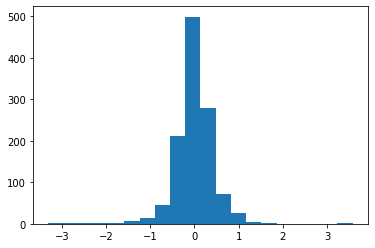

In [39]:
#from matplotlib import pyplot as plt
plt.hist(Error,bins=20)
plt.show()

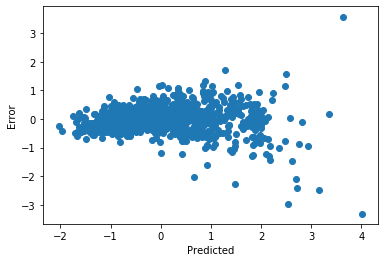

In [64]:
# plot error vs predicted
plt.scatter(train_predict,Error)
plt.xlabel("Predicted")                                 # label for X axis
plt.ylabel("Error")   
#plt.legend()
plt.show()

In [65]:
# apply the model on test
predict = CV.predict(X_test_final)
# calculate r square
print(CV.score(X_test_final,Y_test_SS))

0.6547289567323271


In [66]:
# check correlation between independent and dependent in test
print(np.corrcoef(Y_train.SalePrice,X_train.TotalBsmtSF))
print(np.corrcoef(Y_test.SalePrice,X_test.TotalBsmtSF))

[[1.         0.63553525]
 [0.63553525 1.        ]]
[[1.         0.55850995]
 [0.55850995 1.        ]]


In [67]:
print(np.corrcoef(Y_train.SalePrice,X_train.GrLivArea))
print(np.corrcoef(Y_test.SalePrice,X_test.GrLivArea))

[[1.         0.72170652]
 [0.72170652 1.        ]]
[[1.         0.66509277]
 [0.66509277 1.        ]]


In [68]:
print(np.corrcoef(Y_train.SalePrice,X_train.GarageArea))
print(np.corrcoef(Y_test.SalePrice,X_test.GarageArea))

[[1.         0.64660265]
 [0.64660265 1.        ]]
[[1.         0.54440532]
 [0.54440532 1.        ]]


In [69]:
# get the predicted sale prices to original scale
print(predict[0:10])
predictfinal = SS2.inverse_transform(predict)
print(predictfinal[0:10])

[[ 1.58956619]
 [-0.46245672]
 [-0.7122339 ]
 [ 0.63838272]
 [-1.05972269]
 [-1.01779271]
 [ 0.74032007]
 [-0.70958336]
 [ 4.10191667]
 [-0.24843795]]
[[305536.27572845]
 [144521.63148347]
 [124922.54037865]
 [230900.42909263]
 [ 97656.38117697]
 [100946.47125176]
 [238899.07548188]
 [125130.51802569]
 [502671.12175959]
 [161314.89243689]]


In [20]:
# LASSO regression
# build linear model using sklearn
from sklearn.linear_model import Lasso
# initialize linear model
LASSO = Lasso(normalize=False,max_iter=100)
# apply cross validation
from sklearn.model_selection import GridSearchCV
params = {"alpha": [0.01,0.10,0.50,1.0],
          "fit_intercept":['True','False']}
CV2 = GridSearchCV(estimator = LASSO, scoring='r2',cv=5,refit=True,
                  return_train_score=True,param_grid=params,verbose=10)
# apply linear model
CV2.fit(X_train_final, Y_train_SS)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] alpha=0.01, fit_intercept=True ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.01, fit_intercept=True, score=(train=0.752, test=0.795), total=   0.3s
[CV] alpha=0.01, fit_intercept=True ..................................
[CV]  alpha=0.01, fit_intercept=True, score=(train=0.777, test=0.639), total=   0.0s
[CV] alpha=0.01, fit_intercept=True ..................................
[CV]  alpha=0.01, fit_intercept=True, score=(train=0.751, test=0.776), total=   0.0s
[CV] alpha=0.01, fit_intercept=True ..................................
[CV]  alpha=0.01, fit_intercept=True, score=(train=0.761, test=0.736), total=   0.0s
[CV] alpha=0.01, fit_intercept=True ..................................
[CV]  alpha=0.01, fit_intercept=True, score=(train=0.751, test=0.817), total=   0.0s
[CV] alpha=0.01, fit_intercept=False .................................
[CV]  alpha=0.01, fit_intercept=False, score=(train=0.752, test=0.795), total=   0.0s
[CV] alpha=0.01, fit_intercept=False .................................
[CV]  alpha=0.01, fit_intercept=False, score=(train=0.777, test

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s



[CV] alpha=0.5, fit_intercept=False ..................................
[CV]  alpha=0.5, fit_intercept=False, score=(train=0.294, test=0.290), total=   0.0s
[CV] alpha=0.5, fit_intercept=False ..................................
[CV]  alpha=0.5, fit_intercept=False, score=(train=0.348, test=0.377), total=   0.0s
[CV] alpha=1.0, fit_intercept=True ...................................
[CV]  alpha=1.0, fit_intercept=True, score=(train=0.000, test=-0.000), total=   0.0s
[CV] alpha=1.0, fit_intercept=True ...................................
[CV]  alpha=1.0, fit_intercept=True, score=(train=0.000, test=-0.001), total=   0.0s
[CV] alpha=1.0, fit_intercept=True ...................................
[CV]  alpha=1.0, fit_intercept=True, score=(train=0.000, test=-0.009), total=   0.0s
[CV] alpha=1.0, fit_intercept=True ...................................
[CV]  alpha=1.0, fit_intercept=True, score=(train=0.000, test=-0.001), total=   0.0s
[CV] alpha=1.0, fit_intercept=True ............................

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=100, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0],
                         'fit_intercept': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=10)

In [22]:
print(CV2.best_estimator_.n_iter_)
print(CV2.best_estimator_)

11
Lasso(alpha=0.01, copy_X=True, fit_intercept='True', max_iter=100,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [23]:
print(CV2.best_estimator_.coef_)
print(CV2.best_estimator_.intercept_)

[ 0.27872839  0.44774373  0.22414956 -0.          0.         -0.
 -0.         -0.          0.          0.          0.         -0.07697116
  0.         -0.         -0.         -0.         -0.11210105 -0.
 -0.          0.18668956  0.5257667  -0.28299635 -0.         -0.
 -0.          0.10343323  0.08280842  0.          0.        ]
[0.00386346]


In [24]:
print(CV2.best_score_)

0.7526538003111525


In [26]:
CVResults = pd.DataFrame(CV2.cv_results_)
CVResults.to_excel('CVResults_Lasso.xlsx')

In [47]:
# draw histogram of errors
train_predict2 = CV2.predict(X_train_final)
print(train_predict2.shape)
train_predict2.resize(len(train_predict2),1)
print(train_predict2[0:5])
print(Y_train_SS.shape)
Error2 = train_predict2 - Y_train_SS
print(Error2.shape)

(1168,)
[[ 1.64074973]
 [-0.93829567]
 [-0.64458433]
 [ 0.91078772]
 [ 0.74849989]]
(1168, 1)
(1168, 1)


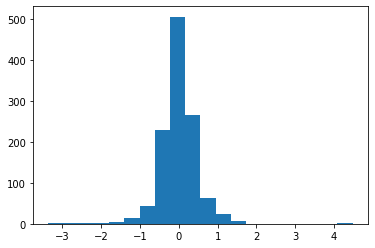

In [48]:
plt.hist(Error2,bins=20)
plt.show()

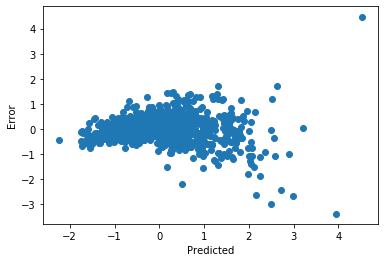

In [50]:
# plot error vs predicted
plt.scatter(train_predict2,Error2)
plt.xlabel("Predicted")                             
plt.ylabel("Error") 
plt.show()

In [51]:
# apply the model on test
#predict2 = CV2.predict(X_test_final)
# calculate r square
print(CV2.score(X_test_final,Y_test_SS))

0.5493896612612837


In [52]:
# Ridge regression
# build linear model using sklearn
from sklearn.linear_model import Ridge
# initialize linear model
RIDGE = Ridge(fit_intercept=True, normalize=False,
              max_iter=10,solver='auto')
# apply cross validation
from sklearn.model_selection import GridSearchCV
params = {"alpha": [0.2,0.4,0.6,0.8,1.0]}
CV3 = GridSearchCV(estimator = RIDGE, scoring='r2',cv=5,refit=True,
                  return_train_score=True,param_grid=params,verbose=10)
# apply linear model
CV3.fit(X_train_final, Y_train_SS)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] alpha=0.2 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... alpha=0.2, score=(train=0.798, test=0.826), total=   0.3s
[CV] alpha=0.2 .......................................................
[CV] ....... alpha=0.2, score=(train=0.820, test=0.731), total=   0.0s
[CV] alpha=0.2 .......................................................
[CV] ....... alpha=0.2, score=(train=0.799, test=0.808), total=   0.0s
[CV] alpha=0.2 .......................................................
[CV] ....... alpha=0.2, score=(train=0.814, test=0.767), total=   0.0s
[CV] alpha=0.2 .......................................................
[CV] ....... alpha=0.2, score=(train=0.799, test=0.823), total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] ....... alpha=0.4, score=(train=0.798, test=0.826), total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] ....... alpha=0.4, score=(train=0.820, test=0.731), total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV] ....... alpha=0.6, score=(train=0.799, test=0.824), total=   1.8s
[CV] alpha=0.8 .......................................................
[CV] ....... alpha=0.8, score=(train=0.798, test=0.827), total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] ....... alpha=0.8, score=(train=0.820, test=0.729), total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] ....... alpha=0.8, score=(train=0.799, test=0.809), total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] ....... alpha=0.8, score=(train=0.814, test=0.768), total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] ....... alpha=0.8, score=(train=0.799, test=0.825), total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ....... alpha=1.0, score=(train=0.798, test=0.827), total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=10)

In [53]:
print(CV3.best_estimator_)
print(CV3.best_estimator_.coef_)
print(CV3.best_estimator_.intercept_)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10, normalize=False,
      random_state=None, solver='auto', tol=0.001)
[[ 0.2305061   0.41282737  0.14730158  0.00623219  0.0863617  -0.15824278
  -0.2817312  -0.20626005  0.11759865  0.11819624  0.21040393 -0.34272175
   0.12641834 -0.49721907 -0.36431112 -0.20263736 -0.24240097 -0.18749736
  -0.14221683  0.7006114   0.86319822 -0.49200954 -0.53089403 -0.24525959
  -0.06231792  0.31638182  0.83903065  0.30269612  0.27482251]]
[0.03153989]


In [54]:
CV3.best_score_

0.7914863614319423

In [55]:
CV3Results = pd.DataFrame(CV3.cv_results_)
CV3Results.to_excel('CV3Results_Ridge.xlsx')

In [57]:
# draw histogram of errors
train_predict3 = CV3.predict(X_train_final)
print(train_predict3.shape)
#print(Y_train.SalePrice.shape)
Error3 = train_predict3 - Y_train_SS
print(Error3.shape)

(1168, 1)
(1168, 1)


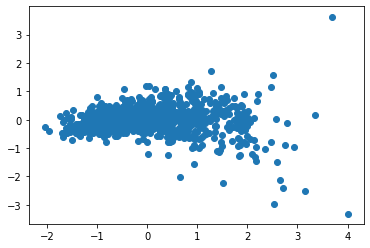

In [58]:
# plot error vs predicted
plt.scatter(train_predict3,Error3)
plt.show()

In [59]:
# R square on test
print(CV3.score(X_test_final, Y_test_SS))

0.650830162810248


In [60]:
# Elasticnet
# build elasticnet using sklearn
from sklearn.linear_model import ElasticNet
# initialize ElasticNet
EN = ElasticNet(fit_intercept=True, normalize=False,
              max_iter=10000)
# apply cross validation
from sklearn.model_selection import GridSearchCV
params = {"alpha": [0.2,0.4,0.6,0.8,1.0],
          "l1_ratio": [0.2,0.4,0.6,0.8,1.0]}
CV4 = GridSearchCV(estimator = EN, scoring='r2',cv=5,refit=True,
                  return_train_score=True,param_grid=params,verbose=10)
# apply linear model
CV4.fit(X_train_final, Y_train_SS)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] alpha=0.2, l1_ratio=0.2 .........................................
[CV]  alpha=0.2, l1_ratio=0.2, score=(train=0.691, test=0.722), total=   0.0s
[CV] alpha=0.2, l1_ratio=0.2 .........................................
[CV]  alpha=0.2, l1_ratio=0.2, score=(train=0.725, test=0.608), total=   0.0s
[CV] alpha=0.2, l1_ratio=0.2 .........................................
[CV]  alpha=0.2, l1_ratio=0.2, score=(train=0.691, test=0.716), total=   0.0s
[CV] alpha=0.2, l1_ratio=0.2 .........................................
[CV]  alpha=0.2, l1_ratio=0.2, score=(train=0.699, test=0.691), total=   0.0s
[CV] alpha=0.2, l1_ratio=0.2 .........................................
[CV]  alpha=0.2, l1_ratio=0.2, score=(train=0.689, test=0.760), total=   0.0s
[CV] alpha=0.2, l1_ratio=0.4 .........................................
[CV]  alpha=0.2, l1_ratio=0.4, score=(train=0.683, test=0.711), total=   0.0s
[CV] alpha=0.2, l1_ratio=0.4 ...............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.2, l1_ratio=0.8 .........................................
[CV]  alpha=0.2, l1_ratio=0.8, score=(train=0.659, test=0.682), total=   0.0s
[CV] alpha=0.2, l1_ratio=0.8 .........................................
[CV]  alpha=0.2, l1_ratio=0.8, score=(train=0.692, test=0.591), total=   0.0s
[CV] alpha=0.2, l1_ratio=0.8 .........................................
[CV]  alpha=0.2, l1_ratio=0.8, score=(train=0.656, test=0.671), total=   0.0s
[CV] alpha=0.2, l1_ratio=0.8 .........................................
[CV]  alpha=0.2, l1_ratio=0.8, score=(train=0.663, test=0.653), total=   0.0s
[CV] alpha=0.2, l1_ratio=0.8 .........................................
[CV]  alpha=0.2, l1_ratio=0.8, score=(train=0.660, test=0.730), total=   0.0s
[CV] alpha=0.2, l1_ratio=1.0 .........................................
[CV]  alpha=0.2, l1_ratio=1.0, score=(train=0.642, test=0.662), total=   0.0s
[CV] alpha=0.2, l1_ratio=1.0 .........................................
[CV]  alpha=0.2, l1_ratio=1.0, sco

[CV]  alpha=0.8, l1_ratio=0.6, score=(train=0.307, test=0.306), total=   0.0s
[CV] alpha=0.8, l1_ratio=0.6 .........................................
[CV]  alpha=0.8, l1_ratio=0.6, score=(train=0.324, test=0.291), total=   0.0s
[CV] alpha=0.8, l1_ratio=0.6 .........................................
[CV]  alpha=0.8, l1_ratio=0.6, score=(train=0.276, test=0.259), total=   0.0s
[CV] alpha=0.8, l1_ratio=0.6 .........................................
[CV]  alpha=0.8, l1_ratio=0.6, score=(train=0.284, test=0.277), total=   0.0s
[CV] alpha=0.8, l1_ratio=0.6 .........................................
[CV]  alpha=0.8, l1_ratio=0.6, score=(train=0.331, test=0.356), total=   0.0s
[CV] alpha=0.8, l1_ratio=0.8 .........................................
[CV]  alpha=0.8, l1_ratio=0.8, score=(train=0.108, test=0.104), total=   0.0s
[CV] alpha=0.8, l1_ratio=0.8 .........................................
[CV]  alpha=0.8, l1_ratio=0.8, score=(train=0.088, test=0.087), total=   0.0s
[CV] alpha=0.8, l1_ratio=0.8

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=10000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=10)

In [61]:
print(CV4.best_estimator_)
print(CV4.best_estimator_.coef_)

ElasticNet(alpha=0.2, copy_X=True, fit_intercept=True, l1_ratio=0.2,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
[ 0.27463224  0.38907617  0.24822668 -0.          0.         -0.
 -0.         -0.          0.          0.          0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.        ]


In [62]:
print(CV4.best_score_)

0.69923101773848


In [63]:
CV4Results = pd.DataFrame(CV4.cv_results_)
CV4Results.to_excel('CV4Results_Elasticnet.xlsx')

In [65]:
# draw histogram of errors
train_predict4 = CV4.predict(X_train_final)
train_predict4.resize(len(train_predict4),1)
print(train_predict4.shape)
print(Y_train.SalePrice.shape)
Error4 = train_predict4 - Y_train_SS
print(Error4.shape)

(1168, 1)
(1168,)
(1168, 1)


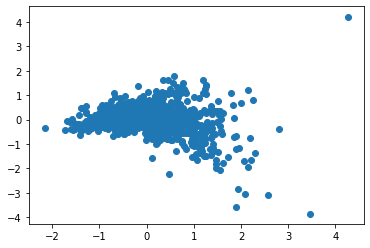

In [66]:
# plot error vs predicted
plt.scatter(train_predict4,Error4)
plt.show()

In [67]:
# R square on test
print(CV4.score(X_test_final, Y_test_SS))

0.5096553977603134
